 <h1> <font color='blue'> CVEN 5301: ST: Computational Skills in Engineering using Python </font> </h1>

<h2> <font color='red'> Exam 2: Ademola Ibironke </font> </h2>

### Problem 1:

### Given a system of truss with 2 point loads 400N and 200N,

### deriving  for resolution of forces  from section B and assuming fixed support at the center joint,
0.866*F1 - 0.5*F3 = 0
0.5F1 + 0.866*F3 =-200
0.866*F1 -F2 - H2 = 0
0.5*F1 -V2 = 0
F2 + 0.5*F3 = 0
0.866*F3 -V3 =0

In [23]:
# the system of equations can be written in matrrix form as Ax = b where,
a = np.array([[0.866,0,-0.5,0,0,0],[0.5,0,0.866,0,0,0],[0.866,-1,0,-1,0,0],[-0.5,0,0,0,-1,0],[0,1,0.5,0,0,0],[0,0,-0.866,0,0,-1]])

In [29]:
#Using Gauss-Seidel Method
"""For Guass-Siedel Iterative method to work, a convergence of the solution may be needed. 
Convergence occurs when the absolute value of the diagonal element > sum of absolute values of the non-diagonal elements,
in each row of the coefft matrix. This means the coefft matrix 'a' is diagonally dominant,
 although the matrices can still be solved with non-dominant diagonal coefft matrix."""

 # Find diagonal coefficients
diag = np.diag(np.abs(a)) #1D array of the values of the diagonal coeffts
diag

array([0.866, 0.   , 0.   , 0.   , 0.   , 1.   ])

In [30]:
# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag #1D array of the values of the sum of non-diagonal coeffts in each row minus the diagonal element
off_diag

#To test whether all elements evaluates true
if np.all(diag > off_diag): #if abs value of all diag elements is greater than sum of all non-diagonals, in each row
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')
 

NOT diagonally dominant


In [27]:
#Initialize reaction forces
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x5 = 0
x6 = 0
error = 0.0001
converged = False   

fi = np.array([x1, x2, x3, x4, x5, x6]) #1D array of assumed forces
fi
type(fi)

print('Iteration results')
print('   forces,   x1,   x2,   x3,  x4,  x5, x6')
for forces in range(1, 100): #range of iterations 
#Isolate one unknown in each of the equations
    x1 = 0.5* x3/0.866 
    x2 = -x4 -0.866*x1
    x3 = (-200 -0.5*x1)/0.866
    x4 = -x2- 0.866*x1
    x5 = 0.5*x1
    x6 = 0.866*x3
    f = np.array([x1, x2, x3, x4, x5, x6]) #1D array of new forces
    type(f)
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(f-fi, f-fi)) #square root of the dot product of difference b/w c &cj
    dx
    dy= np.abs((f-fi)/f)*100 #relative absolute approx error for each conc
    dy 
    print("%d, %.2f, %.2f, %.2f, %.2f,%.2f, %.2f"% (forces, x1, x2, x3, x4, x5, x6)) #formating float to 2 decimal places
    if dy.all() < error:
        converged = True
        print('Converged!')
        break

    # assign the latest f value to the old value
    fi = f
    
if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
   forces,   x1,   x2,   x3,  x4,  x5, x6
1, 0.00, 0.00, -230.95, -0.00,0.00, -200.00
2, -133.34, 115.47, -153.96, 0.00,-66.67, -133.33
3, -88.89, 76.98, -179.62, 0.00,-44.45, -155.55
4, -103.71, 89.81, -171.07, 0.00,-51.85, -148.15
5, -98.77, 85.53, -173.92, 0.00,-49.38, -150.62
6, -100.42, 86.96, -172.97, 0.00,-50.21, -149.79
7, -99.87, 86.48, -173.29, 0.00,-49.93, -150.07
8, -100.05, 86.64, -173.18, 0.00,-50.03, -149.97
9, -99.99, 86.59, -173.22, 0.00,-49.99, -150.01
10, -100.01, 86.61, -173.20, 0.00,-50.00, -150.00
11, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
12, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
13, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
14, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
15, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
16, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
17, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
18, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
19, -100.00, 86.60, -173.21, 0.00,-50.00, -150.00
20, -10

C:\Users\Ademola Ibironke\AppData\Local\Temp\ipykernel_28920\1138862784.py:30: RuntimeWarning: invalid value encountered in divide
  dy= np.abs((f-fi)/f)*100 #relative absolute approx error for each conc


### Problem 2:

Gringorten plotting position is given by the following equation:
$$
F(x) = \frac{r - 0.44}{n + 0.12}
$$

To calculate the empirical cummulative distribution curve,

In [6]:
import pandas as pd
import os

#Set Working directory
path = 'D:\CVEN 5301 Python'
os.chdir(path)

In [9]:
# define function for Gringoten Plotting Position
def funGring(r,n):
    funGring = r-0.44/n+0.12
    return(funGring)

In [11]:
# to calculate the CDF
import matplotlib.pyplot as plt
import numpy as np

#Read data
fname = 'Ayish.csv' #Name of the csv file
b = pd.read_csv(fname) # to make "read_csv" read the file "fname" 
type(b) #To confirm data type for object 'b'
b.head(5) # first five rows of Ayish Bayou peak streamflow 1960 to 1985

,agency_cd,site_no,parameter_cd,ts_id,year_nu,mean_va
0,USGS,8039100,60,132821,1960,72.0
1,USGS,8039100,60,132821,1961,156.0
2,USGS,8039100,60,132821,1962,68.8
3,USGS,8039100,60,132821,1963,31.9
4,USGS,8039100,60,132821,1964,54.0


### Data source: URL: https://waterdata.usgs.gov/nwis/annual?

In [13]:
#Extract the 'mean_va' column
p = b.mean_va
p

0      72.00
1     156.00
2      68.80
3      31.90
4      54.00
5      24.80
6      76.30
7      17.40
8     113.30
9     141.80
10     27.90
11      6.36
12     39.80
13    148.40
14    165.00
15    171.70
16     49.00
17     42.40
18     74.40
19    190.60
20     86.10
21     23.90
22     53.20
23    171.30
24    106.30
25     64.00
Name: mean_va, dtype: float64

In [14]:
#convert to numpy array
pp =np.array(p)
pp

array([ 72.  , 156.  ,  68.8 ,  31.9 ,  54.  ,  24.8 ,  76.3 ,  17.4 ,
       113.3 , 141.8 ,  27.9 ,   6.36,  39.8 , 148.4 , 165.  , 171.7 ,
        49.  ,  42.4 ,  74.4 , 190.6 ,  86.1 ,  23.9 ,  53.2 , 171.3 ,
       106.3 ,  64.  ])

In [16]:
# calculate the proportional values of samples
q = 1. * np.arange(len(pp)) / (len(pp) - 1)
q

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  ])

In [17]:
r = b. year_nu
r

0     1960
1     1961
2     1962
3     1963
4     1964
5     1965
6     1966
7     1967
8     1968
9     1969
10    1970
11    1971
12    1972
13    1973
14    1974
15    1975
16    1976
17    1977
18    1978
19    1979
20    1980
21    1981
22    1982
23    1983
24    1984
25    1985
Name: year_nu, dtype: int64

In [18]:
#convert to numpy array
rr =np.array(r)
rr

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985], dtype=int64)

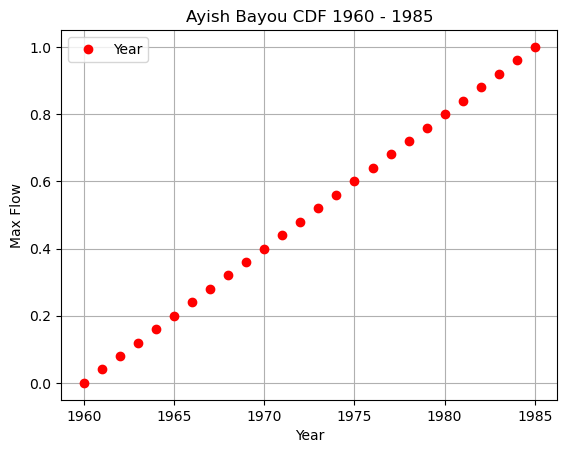

In [19]:
# plot the sorted data:
plt.plot(rr,q,'ro') #red circles
plt.xlabel('Year') #xlabel
plt.ylabel('Max Flow')#ylabel
plt.grid()# for aesthetics
plt.title('Ayish Bayou CDF 1960 - 1985')
plt.legend(['Year'],loc='upper left')#legend upper left
plt.show() #show the plot